In [4]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Read and Merge Dengue Data
# loading do CSV de features e labels e merge dos dados:
# loading do CSV de features e labels e merge dos dados:
df_features = pd.read_csv("dados/dengue_features_train.csv", na_values=[" ","...","na","NA","nan","Na"])
df_labels = pd.read_csv("dados/dengue_labels_train.csv",na_values=[" ","...","na","NA","nan","Na"])
df_dengue = pd.merge(df_features,df_labels)

In [6]:
### Suprimindo as colunas que identificam nomes, períodos ou ciclos da tabela de treino e teste.
df_dengue = df_dengue[['weekofyear', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases']]

In [7]:
#### Change Nan values by mean (train input)
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="mean")
df_dengue_clean = imp.fit(df_dengue).transform(df_dengue)
df_dengue_clean = pd.DataFrame(df_dengue_clean)
df_dengue_clean

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,18.0,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4.0
1,19.0,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5.0
2,20.0,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4.0
3,21.0,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3.0
4,22.0,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,21.0,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5.0
1452,22.0,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8.0
1453,23.0,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1.0
1454,24.0,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1.0


In [8]:
%%html
<h2> Modelo sem transformação dos Dados - Tree 1 </h2>

In [9]:
# SPLIT dos dados - training and test
from sklearn.model_selection import train_test_split
y = df_dengue_clean[21]
X = df_dengue_clean.drop(columns=21, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Training model tree regressor
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=4)
tree.fit(X_train, y_train)
tree.score(X_test,y_test)

0.2935689096900945

In [11]:
%%html
<h2> 2. Modelo com Transformação dos Dados - Normalização </h2>

In [12]:
# Normalize X values
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
scaler.fit(X)
X_norm = scaler.transform(X)

In [13]:
# split data
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=42)

In [14]:
# TRaining model with norm features
tree = DecisionTreeRegressor(max_depth=4)
tree.fit(X_train_norm, y_train)
tree.score(X_test_norm, y_test)

0.3745797354834691

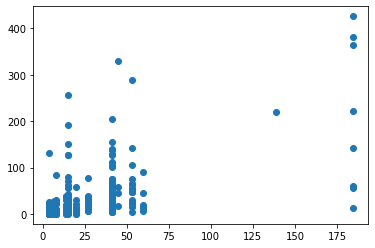

In [15]:
plt.scatter(tree.predict(X_test_norm), y_test)

In [16]:
%%html 
<h2> 3. Modelo Tree com transformada log <h2>

In [17]:
# Transformada em Log do Array
y_arr = np.array(y)
y_log = []
for x in y_arr:
    if x==0:
        y_log.append(x)
    else:
        y_log.append(np.log(x))

In [18]:
### Split dos dados
X_train_norm, X_test_norm, y_log_train, y_log_test = train_test_split(X_norm, y_log, test_size=0.3, random_state=42)

In [19]:
### Train a Tree Regression Log Model
tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X_train_norm, y_log_train)
tree.score(X_test_norm, y_log_test)


0.4057742670174258

In [20]:
%%html
<h2> 4. Modelo com Transformação dos Dados - Normalização </h2>

In [21]:
### Listando a significancia dos coeficientes para o modelo, sem normalização.
#### Construir um modelo com somente os coeficientes mais significativos:
X_new = X[[0,1,2,5,6,9,10,15,18,20]]
# split
X_train_norm, X_test_norm, y_log_train, y_log_test = train_test_split(X_new, y_log, test_size=0.3, random_state=42)
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train_norm, y_log_train)
tree.score(X_test_norm, y_log_test)

0.426093423330836

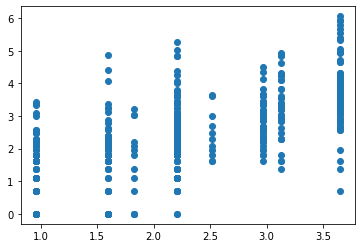

In [22]:
plt.scatter(tree.predict(X_test_norm), y_log_test)

In [23]:
%%html 
<h2> Modelo com dados completos e min max scaler

In [24]:
df_features = pd.read_csv("dados/dengue_features_train.csv", na_values=[" ","...","na","NA","nan","Na"])
df_labels = pd.read_csv("dados/dengue_labels_train.csv",na_values=[" ","...","na","NA","nan","Na"])
df_dengue = pd.merge(df_features,df_labels)
## Suprimindo as colunas que identificam nomes, períodos ou ciclos da tabela de treino e teste.
df_dengue = df_dengue[['city',"year",'weekofyear', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases']]

#### Converting categorical city to once_hot_encoder and merge again with df
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown="ignore")
cities = pd.DataFrame(enc.fit_transform(df_dengue[["city"]]).toarray(), columns=[["iq", "sj"]])
df_dengue = pd.merge(cities, df_dengue, left_index=True ,right_index=True)
df_dengue.drop(columns="city", inplace=True)

### Rename colums names
df_dengue.rename(columns= {('iq',):"iq", ('sj',) :"sj"}, inplace=True)

#### Change Nan values by mean (train input)
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="mean")
df_dengue_clean = imp.fit(df_dengue).transform(df_dengue)
df_dengue_clean = pd.DataFrame(df_dengue_clean)

# Min Max de todos os Dados
from sklearn.preprocessing import MinMaxScaler
scaler_min_max = MinMaxScaler(feature_range=(0,1))
df_dengue_scaled = scaler.fit_transform(df_dengue_clean)
df_dengue_scaled = pd.DataFrame(df_dengue_scaled)

In [25]:
# split data
y = df_dengue_scaled[24]
X = df_dengue_scaled.drop(columns=24, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [26]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=10,random_state=600)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7587603392253197

In [27]:
pd.DataFrame(rf.feature_importances_).sort_values(by=0, ascending=False)

,0
2,0.340105
13,0.097567
14,0.081266
16,0.080308
8,0.067054
12,0.049951
23,0.046625
3,0.035603
9,0.033915
1,0.031216
